# Chart of Run quality

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

#win
#datastore_path="c:/cloudstor/datastore/grating-efficiency/"
#local
datastore_path="measurements/"

Photodiode 1 (PD1) attached to channel 1 on Thorlabs PM320E powermeter
Photodiode 2 (PD2) attached to channel 2 on same powermeter

In [26]:
def PD_mean(str_run,PD):
    disp_list =[]

    for filestring in (glob.glob(datastore_path + str_run + "/*0.txt")):
        with open(filestring, 'r') as f:
            file2list = pd.read_csv(f,header=None,delimiter='\t')
        if PD == 1:
            for item in file2list[2]:
                disp_list.append(item)
        elif PD == 2:
            for item in file2list[4]:
                disp_list.append(item)
    
    mean = np.array(disp_list).mean()
    std = np.array(disp_list).std()
    
    print("mean: " + str(mean * 1000000) + ' \u03BCW')
    print("std: " + str(std * 1000000) + ' \u03BCW')
    
    return(np.array(disp_list).mean())

In [27]:
def Power_level_both_mean(str_run):
    disp_list =[]
    disp_list2 = []
    for filestring in (glob.glob(datastore_path + str_run + "/*.txt")):
        disp_list.append(PD1_mean(filestring))
        disp_list2.append(PD2_mean(filestring))

    t= np.arange(0,len(disp_list),1)
    t2= np.arange(0,len(disp_list2),1)
    file_mean, = plt.plot(t,(np.array(disp_list)*1000000),color='blue')
    #print(disp_list)
    #print(disp_list2)
    file_mean2, = plt.plot(t2,(np.array(disp_list2)*1000000),color='red')
    plt.title(str_run + u'\nPower levels for PDs \u03BCW vs. minutes')
    plt.legend([file_mean,file_mean2],['PD1','PD2'],loc='best')
    #print(disp_list)

In [28]:
def Power_level(str_run, PD, sampling, freq, rollavg):
    disp_list =[]
    print(str_run)
    print(u'Power base level PD' + str(PD) + ' \u03BCW vs. seconds')
    
    for filestring in (glob.glob(datastore_path + str_run + "/*0.txt")):
        with open(filestring, 'r') as f:
            file2list = pd.read_csv(f,header=None,delimiter='\t')
        if PD == 1:
            for item in file2list[2]:
                disp_list.append(item)
        elif PD == 2:
            for item in file2list[4]:
                disp_list.append(item)


#    file_mean = plt.plot((np.array(disp_list)*1000000))

    plt.figure(figsize=(20, 5)) 
    t= np.arange(0,len(disp_list))

#    np.convolve(x, np.ones((N,))/N, mode='valid')

    df = pd.DataFrame(disp_list)
    #df.rolling(window=rollavg).mean()

    rollmean = df.rolling(window=rollavg).mean()
    
    file_mean = plt.plot(t[::freq]/sampling,np.array(disp_list)[::freq]*1000000, label="PD " + str(PD))    
    
    file_rollmean = plt.plot(t[::freq]/sampling,rollmean[::freq]*1000000, label = "rolling mean")

    plt.title(str_run + u'\nPower levels for PDs \u03BCW vs. seconds')
    plt.legend(loc='best')
    plt.xlabel("time (seconds)",fontsize=20)
    plt.ylabel(r'Power levels $\mu$W',fontsize=20) 
    #print(len(disp_list))
    #print(np.array(disp_list)*1000000)

## Dark Runs
### Dark run, 20 minute measurement

PD_dark_run10
Power base level PD1 μW vs. seconds


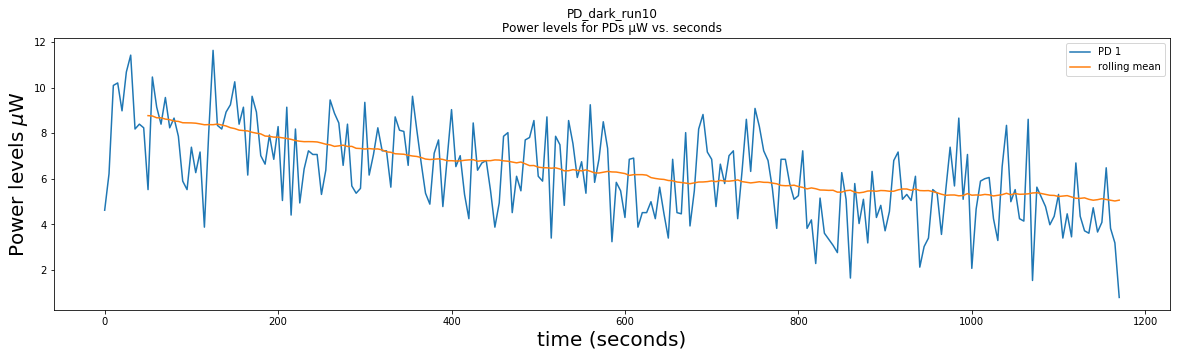

In [29]:
run = "PD_dark_run10"
Power_level(run,1,10,50,500)

PD_dark_run10
Power base level PD2 μW vs. seconds


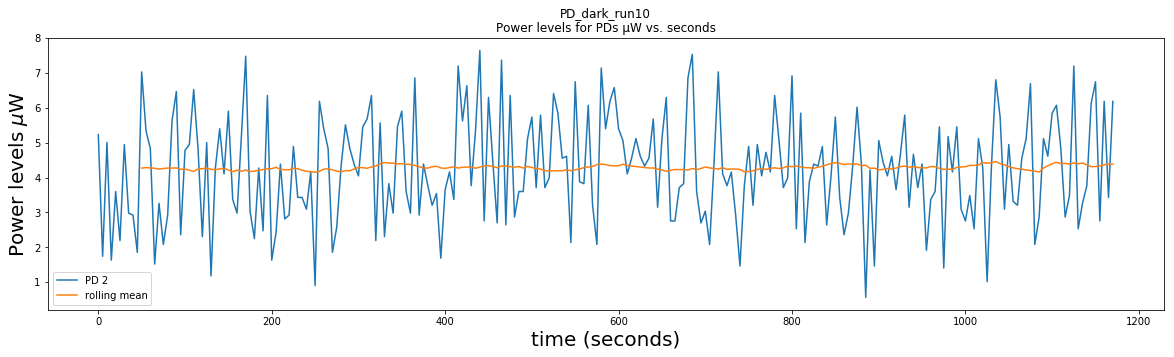

In [30]:
run = "PD_dark_run10"
Power_level(run,2,10,50,500)

### Dark run, 20 minute measurements, photometer set to 10 $\mu$W scale

PD_dark_run11
Power base level PD1 μW vs. seconds


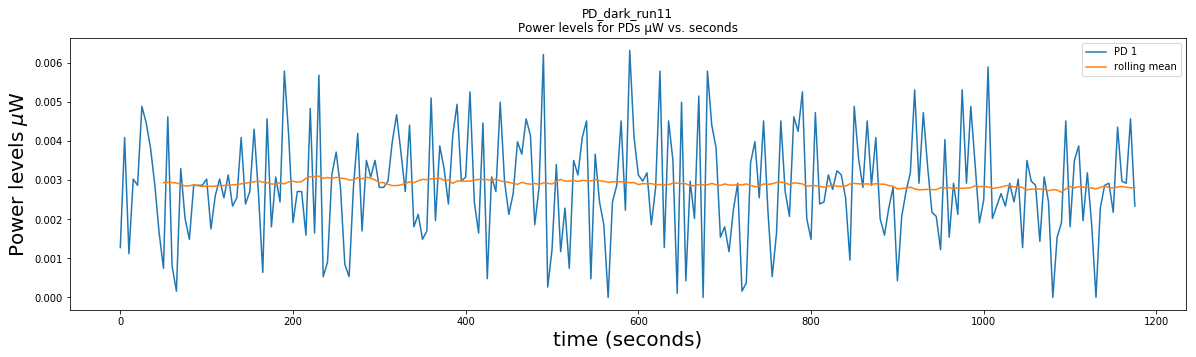

In [31]:
run = "PD_dark_run11"
Power_level(run,1, 10,50,500)

### Dark run, 20 minutes, after laser illumination, photometer back to 1 mW scale
- PD1 was used for runs with laser
- PD2 stayed dark

PD_dark_run13
Power base level PD1 μW vs. seconds


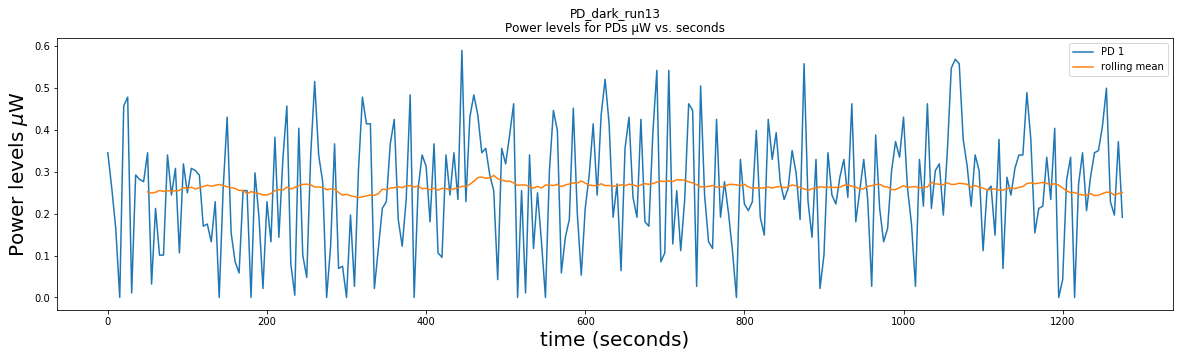

In [32]:
run = "PD_dark_run13"
Power_level(run,1,10,50,500)

PD_dark_run13
Power base level PD2 μW vs. seconds


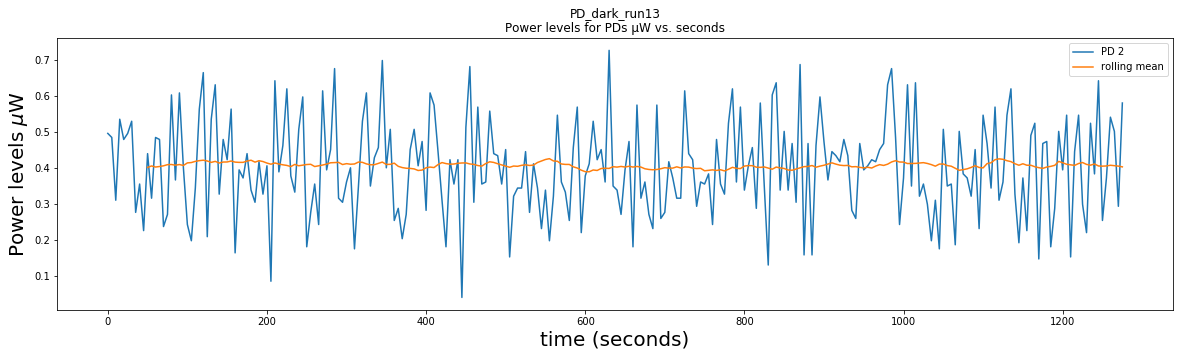

In [33]:
run = "PD_dark_run13"
Power_level(run,2,10,50,500)

## Measuring levels of the 543nm laser

### First measure with beamsplitter in path
- beam splitter splits photodiodes 1 and 2
- photodiode 2 is dark

543nm_measurelaser_run12
Power base level PD1 μW vs. seconds


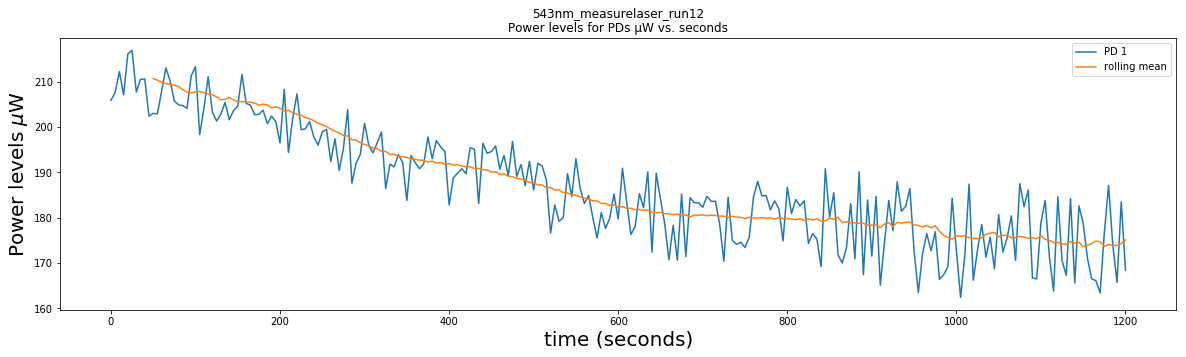

In [34]:
run ="543nm_measurelaser_run12"
Power_level(run,1,10,50,500)

543nm_beamsplittercal_run30
Power base level PD1 μW vs. seconds


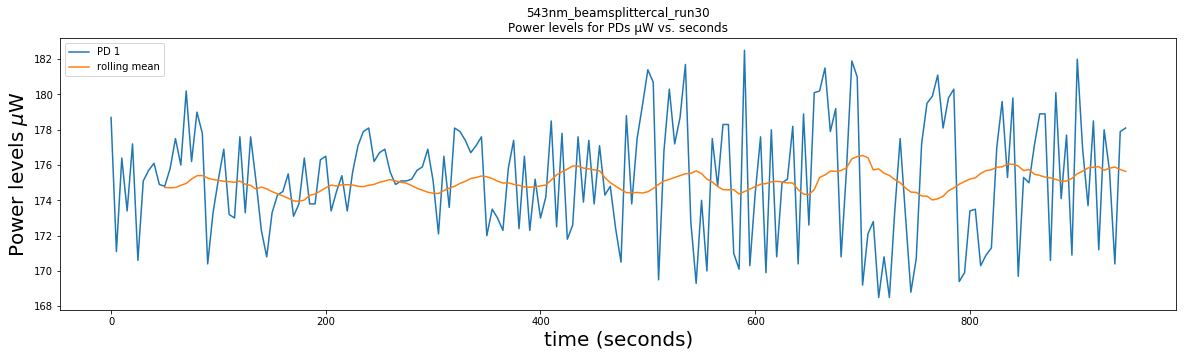

In [35]:
run ="543nm_beamsplittercal_run30"
Power_level(run,1,10,50,500)

543nm_beamsplittercal_run30
Power base level PD2 μW vs. seconds


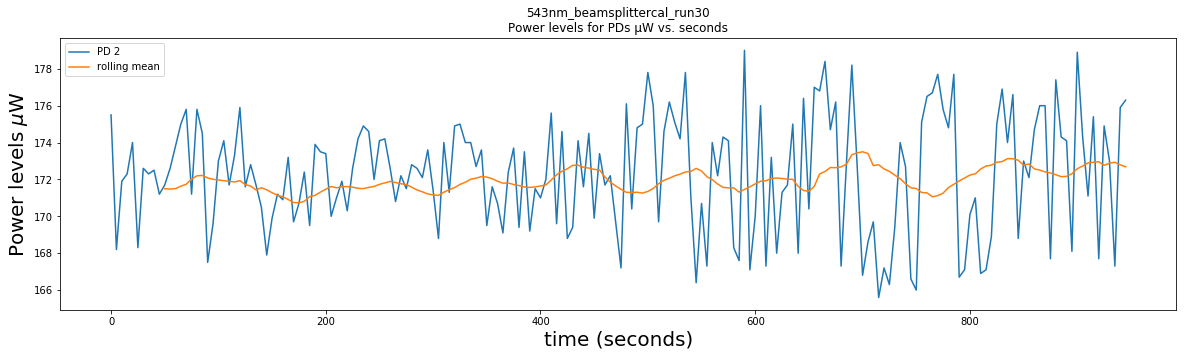

In [36]:
run ="543nm_beamsplittercal_run30"
Power_level(run,2,10,50,500)

In [37]:
run="543nm_lasercal_run29"
fullbeam=PD_mean(run,1)

run ="543nm_beamsplittercal_run30"

BS1=(PD_mean(run,1))/fullbeam*100
BS2=(PD_mean(run,2))/fullbeam*100

print("Beamsplitter grating position: " + str(BS1) + "%")
print("Beamsplitter reference position: " + str(BS2) + "%")

mean: 373.0033330378513 μW
std: 5.053126275774238 μW
mean: 175.07325089833017 μW
std: 3.1938911352199173 μW
mean: 171.9713168463327 μW
std: 3.119337404238464 μW
Beamsplitter grating position: 46.93610898124715%
Beamsplitter reference position: 46.104498704005294%


### Measuring levels wtih no beamsplitter in path

#### laser level before run 15

543nm_nosplit_lasercal_run14
Power base level PD1 μW vs. seconds


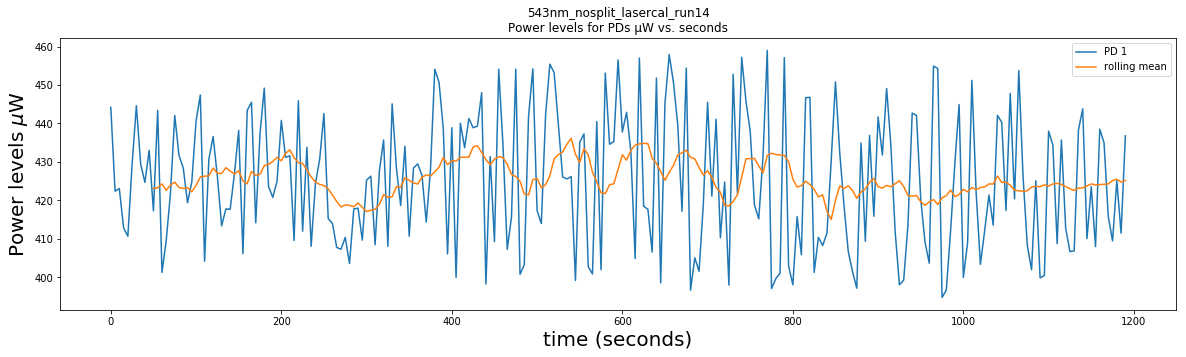

In [38]:
run ="543nm_nosplit_lasercal_run14"
Power_level(run,1,10,50,500)

In [39]:
PD_mean(run,1)

mean: 425.4924930956566 μW
std: 16.975710610846765 μW


0.00042549249309565656

#### laser level after run 15

543nm_lasercal_after_run17
Power base level PD1 μW vs. seconds


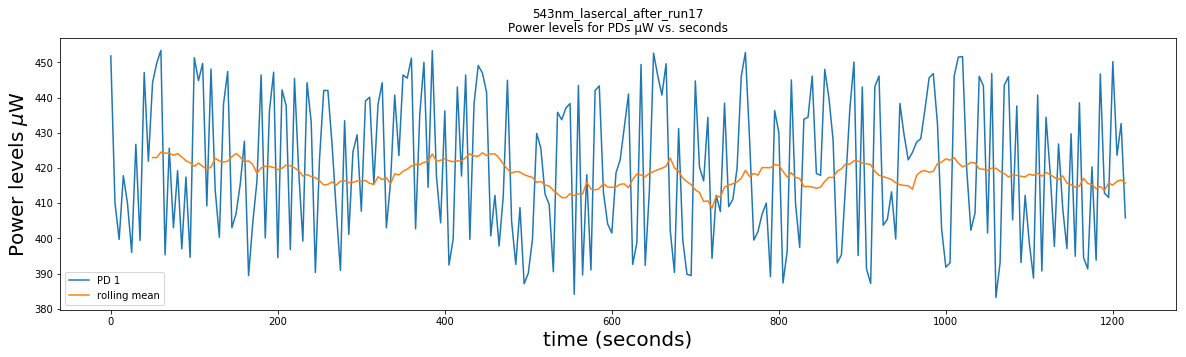

In [40]:
run="543nm_lasercal_after_run17"
Power_level(run,1,10,50,500)

In [41]:
PD_mean(run,1)

mean: 418.3943159448819 μW
std: 21.091187347677334 μW


0.0004183943159448819

543nm_nosplit_lasercal_run22
Power base level PD1 μW vs. seconds


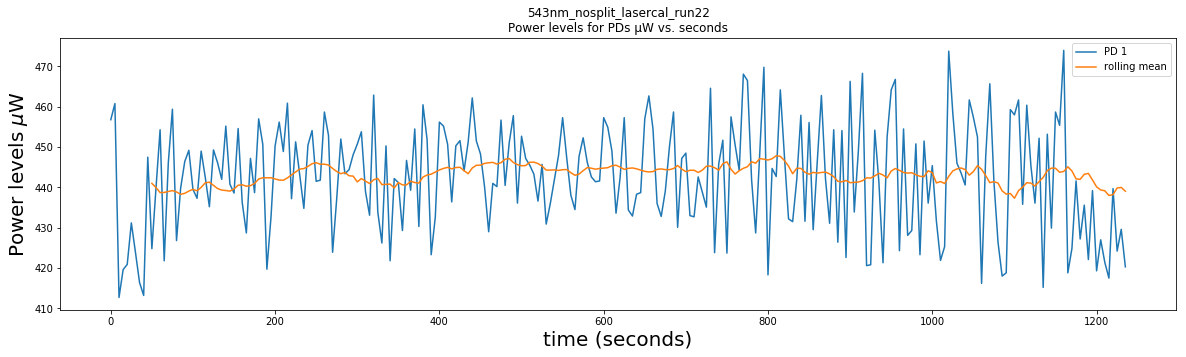

In [42]:
run="543nm_nosplit_lasercal_run22"
Power_level(run,1,10,50,500)

In [43]:
PD_mean(run,1)

mean: 443.0509672197491 μW
std: 13.408263233598111 μW


0.0004430509672197491

543nm_nosplit_lasercal_run25
Power base level PD1 μW vs. seconds


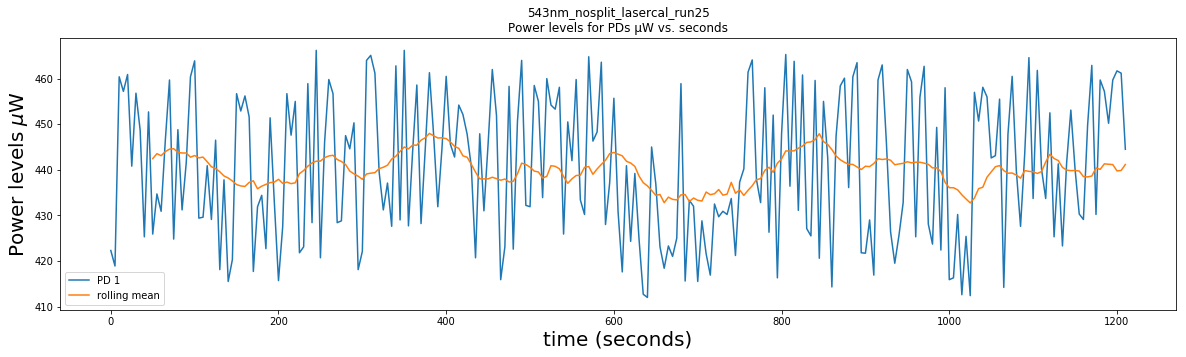

In [44]:
run="543nm_nosplit_lasercal_run25"
Power_level(run,1,10,50,500)

In [45]:
PD_mean(run,1)

mean: 440.1013619479983 μW
std: 15.355727421158615 μW


0.00044010136194799835

543nm_lasercal_run29
Power base level PD1 μW vs. seconds


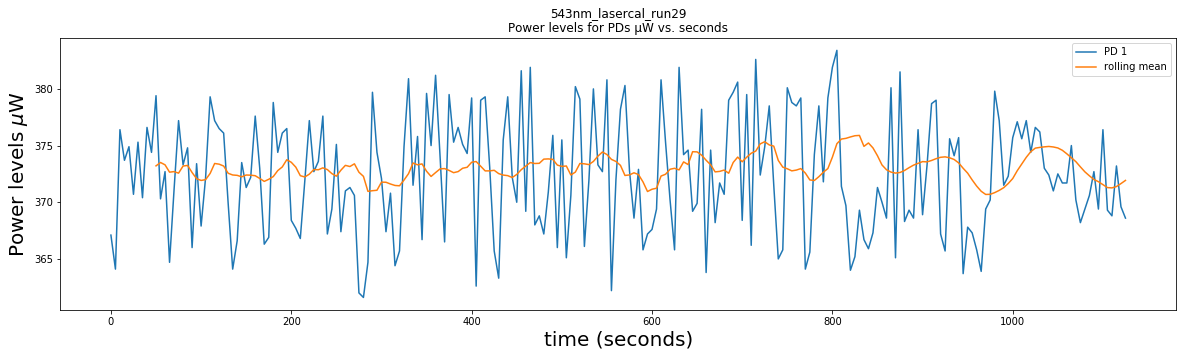

In [46]:
run="543nm_lasercal_run29"
Power_level(run,1,10,50,500)

In [47]:
PD_mean(run,1)

mean: 373.0033330378513 μW
std: 5.053126275774238 μW


0.0003730033330378513

## Measuring levels of the 633nm laser

### Measuring levels wtih beamsplitter in path

633nm_beamsplittercal_run32
Power base level PD1 μW vs. seconds


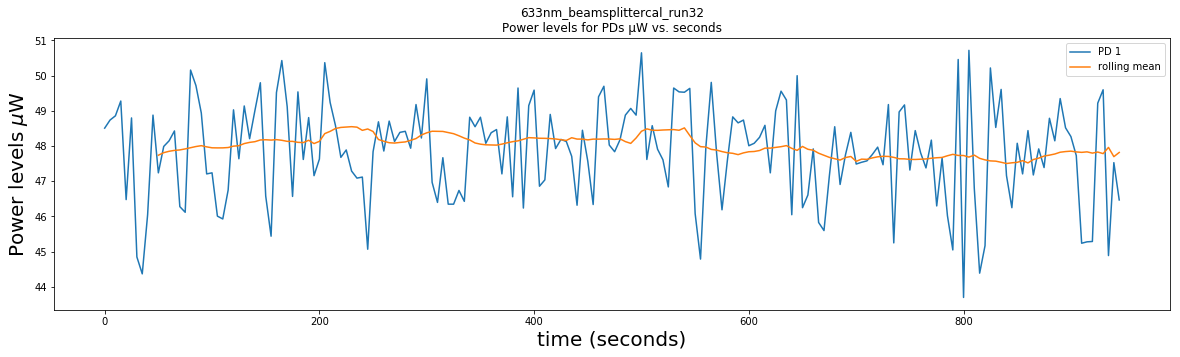

In [48]:
run ="633nm_beamsplittercal_run32"
Power_level(run,1,10,50,500)

633nm_beamsplittercal_run32
Power base level PD2 μW vs. seconds


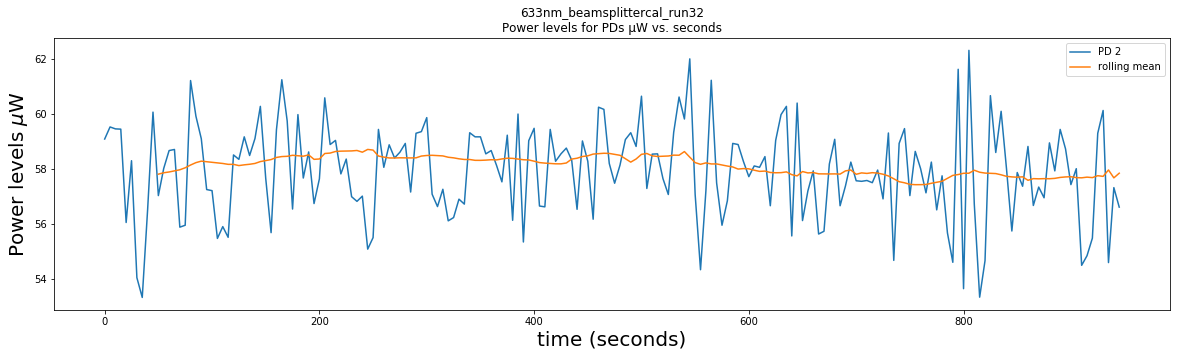

In [49]:
run ="633nm_beamsplittercal_run32"
Power_level(run,2,10,50,500)

In [50]:
run="633nm_lasercal_run31"
fullbeam=PD_mean(run,1)

run ="633nm_beamsplittercal_run32"

BS1=(PD_mean(run,1))/fullbeam*100
BS2=(PD_mean(run,2))/fullbeam*100

print("Beamsplitter grating position: " + str(BS1) + "%")
print("Beamsplitter reference position: " + str(BS2) + "%")

mean: 113.75754265595377 μW
std: 2.9069301770381197 μW
mean: 47.986337774957704 μW
std: 1.434343181908866 μW
mean: 58.09587880710661 μW
std: 1.7417936272362493 μW
Beamsplitter grating position: 42.18299433566942%
Beamsplitter reference position: 51.069913652065004%


### Measuring levels wtih no beamsplitter in path

633nm_nosplitter_lasercal_run18
Power base level PD1 μW vs. seconds


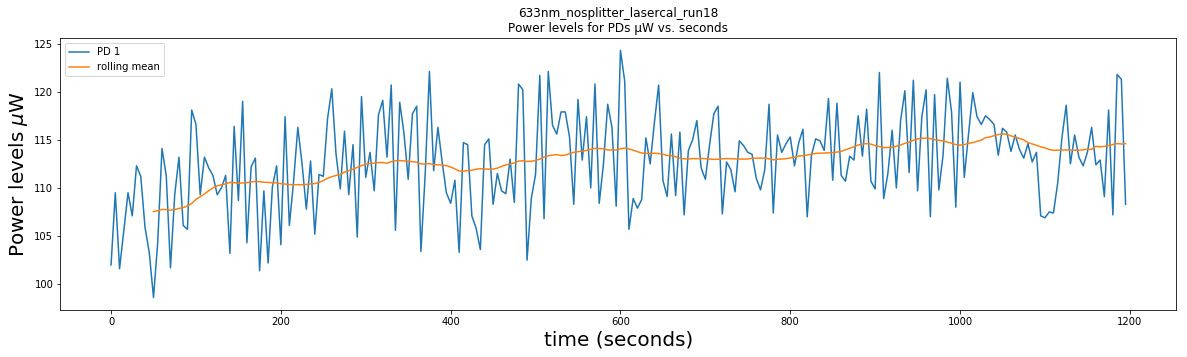

In [51]:
run="633nm_nosplitter_lasercal_run18"
Power_level(run,1,10,50,500)

In [52]:
PD_mean(run,1)

mean: 112.77821222510242 μW
std: 4.74077691394064 μW


0.00011277821222510242

633nm_nosplitter_lasercalpost_run21
Power base level PD1 μW vs. seconds


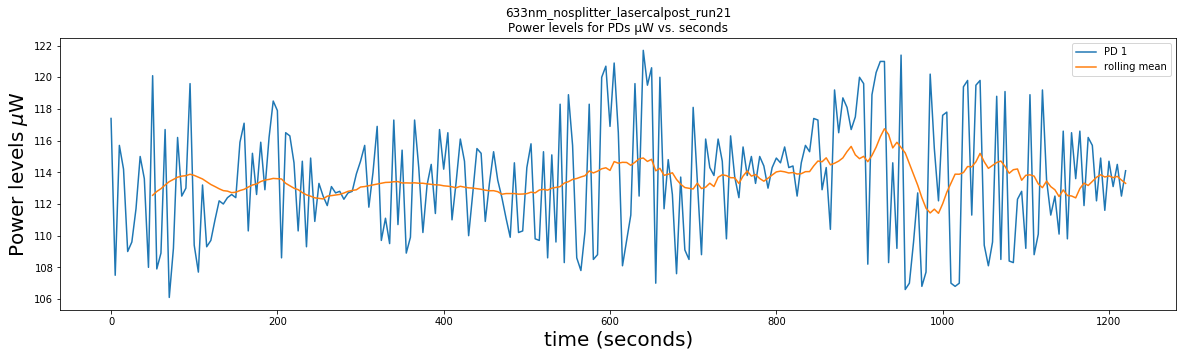

In [53]:
run="633nm_nosplitter_lasercalpost_run21"
Power_level(run,1,10,50,500)

In [54]:
PD_mean(run,1)

mean: 113.5376156554491 μW
std: 3.5734473360119896 μW


0.0001135376156554491

633nm_lasercal_run31
Power base level PD1 μW vs. seconds


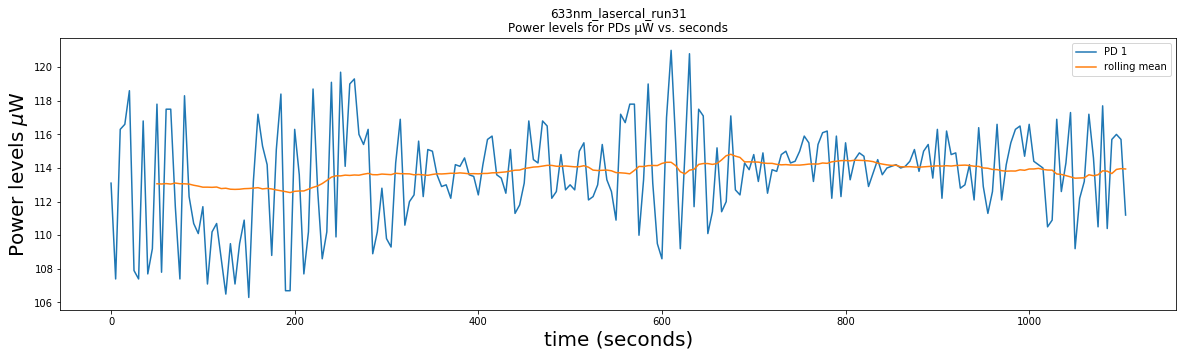

In [55]:
run="633nm_lasercal_run31"
Power_level(run,1,10,50,500)

In [56]:
PD_mean(run,1)

mean: 113.75754265595377 μW
std: 2.9069301770381197 μW


0.00011375754265595377

## Power level through grating measurements at 543 nm and 633 nm
- no beamsplitter in path

### 543 nm
- run 15 and 16 had the photometer incorrectly set to 633 nm sensitivity
- run 23 and 24 has the photometer correctly set to 543 nm sensitivity

543nm_nosplitter_run15
Power base level PD1 μW vs. seconds


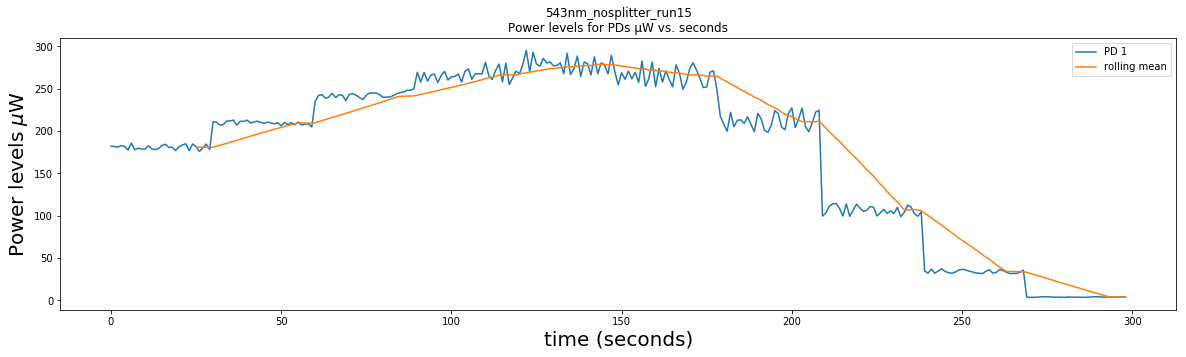

In [57]:
run="543nm_nosplitter_run15"
Power_level(run,1,10,10,250)

543nm_no1_nosplitter_run16
Power base level PD1 μW vs. seconds


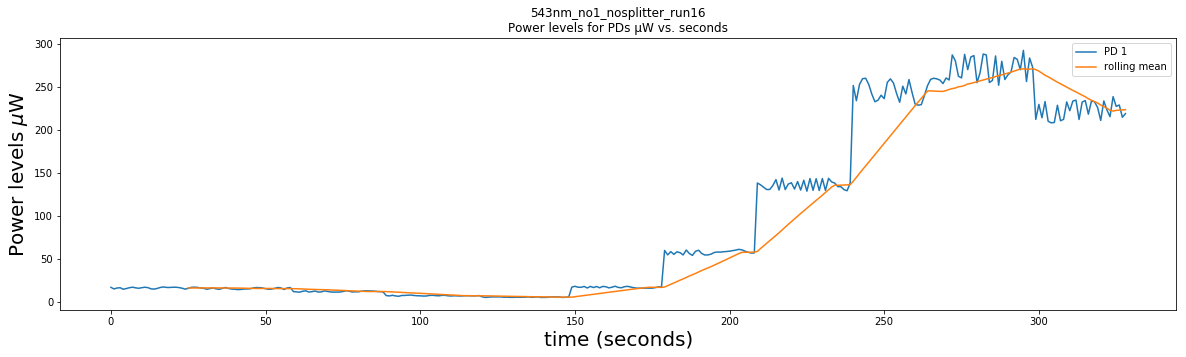

In [58]:
run="543nm_no1_nosplitter_run16"
Power_level(run,1,10,10,250)

543nm_nosplitter_run23
Power base level PD1 μW vs. seconds


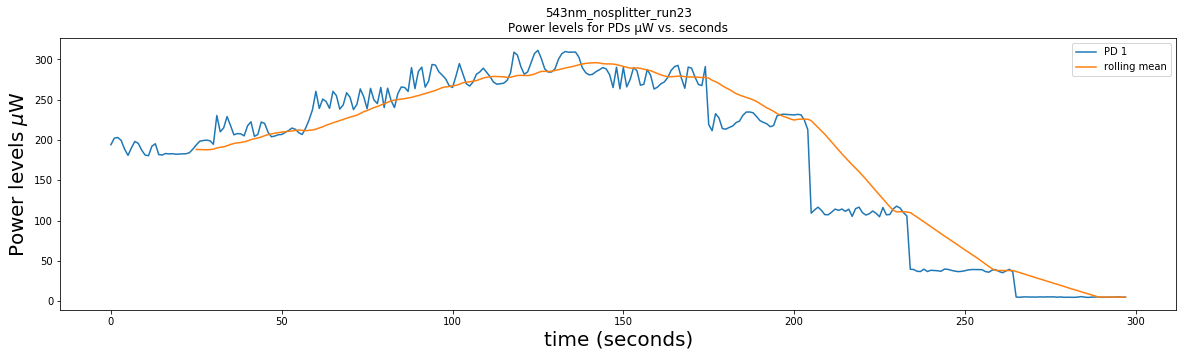

In [59]:
run="543nm_nosplitter_run23"
Power_level(run,1,10,10,250)

543nm_no1_nosplitter_run24
Power base level PD1 μW vs. seconds


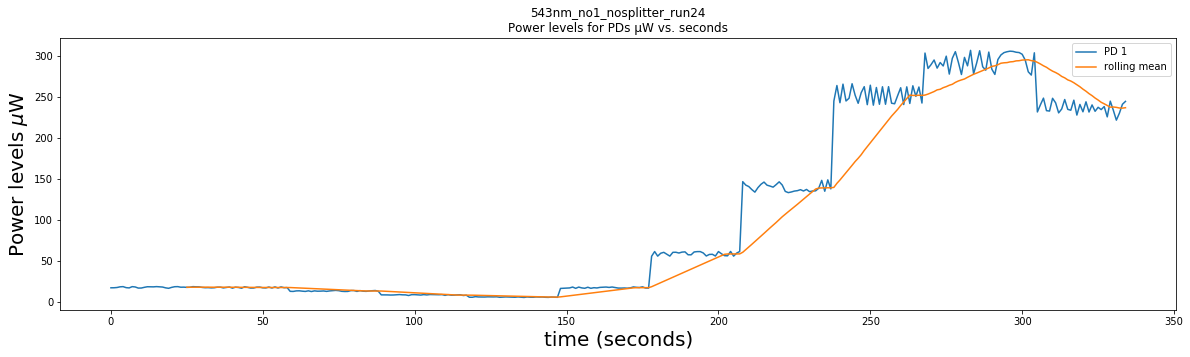

In [60]:
run="543nm_no1_nosplitter_run24"
Power_level(run,1,10,10,250)

### 633 nm

633nm_nosplitter_run19
Power base level PD1 μW vs. seconds


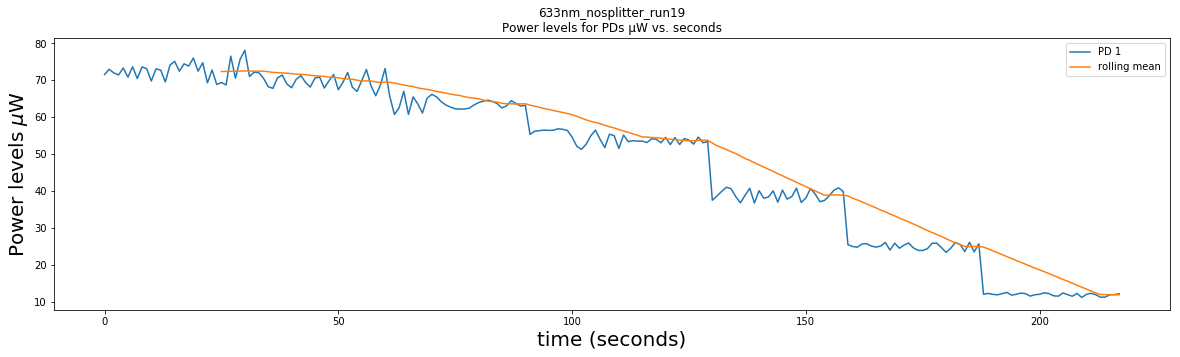

In [61]:
run="633nm_nosplitter_run19"
Power_level(run,1,10,10,250)

633nm_no1_nosplitter_run20
Power base level PD1 μW vs. seconds


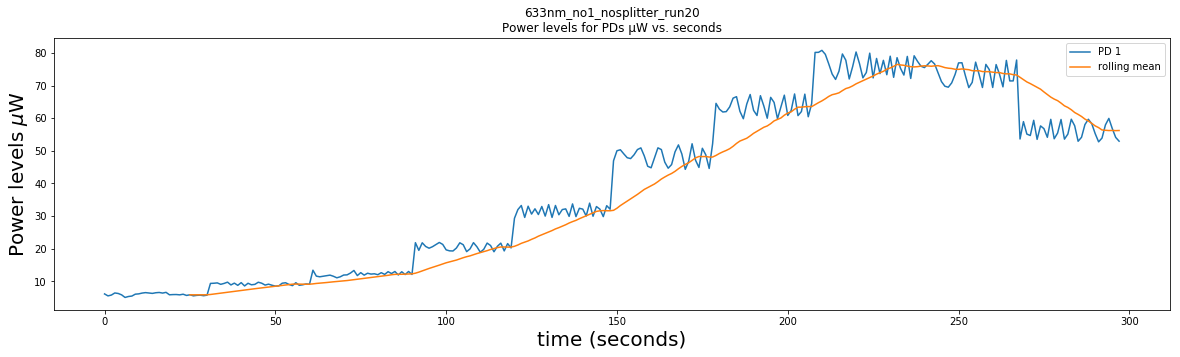

In [62]:
run="633nm_no1_nosplitter_run20"
Power_level(run,1,10,10,250)

## Beamsplitter plots

In [63]:
# results suspect, green laser wasn't properly warmed up
#run = "543nm_beamsplitter_measure_run5"
#Power_level_both_mean(run)
#print("PD1 measuring infront of grating")

In [64]:
# results suspect, green laser wasn't properly warmed up
#run = "543nm_beamsplitter_measure_run6"
#Power_level_both_mean(run)
#print("PD2 measuring infront of grating")

In [65]:
# re-ran with more data points
#run = "633nm_beamsplitter_measure_run3"
#Power_level_both_mean(run)
#print("PD1 measuring infront of grating")

In [ ]:
#re-ran with more data points
#run = "633nm_beamsplitter_measure_run4"
#Power_level_both_mean(run)
#print("PD2 measuring infront of grating")


## Off plane angle variation measurements at 543 nm

In [ ]:
run = "543nm_run0"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

NameError: name 'PD1_mean' is not defined

In [ ]:
run = "543nm_run2"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

In [ ]:
# results suspect, green laser wasn't properly warmed up
run = "543nm_on1_run2"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

In [ ]:
# results suspect, green laser wasn't properly warmed up
run = "543nm_run8"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

In [ ]:
run = "543nm_on1_run8"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

## Off plane angle varition measurments at 633 nm

In [ ]:
run = "633nm_run2"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

In [ ]:
run = "633nm_on1_run2"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

In [ ]:
run = "633nm_run9"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")

In [ ]:
run = "633nm_on1_run9"
Power_level_both_mean(run)
print("PD1 measuring infront of grating")